In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PreprocessedData.csv",index_col=0)

In [3]:
df.head()

,JobSatisfaction,JobSearchStatus,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,...,I don't typically exercise,Male,Below Bachelor_EducationParents,Master_EducationParents,PhD._EducationParents,25 - 34 years old,35 - 44 years old,45 years or older,Under 18 years old,No dependents
0,3.0,"I’m not actively looking, but I am open to new...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-2.0,I am actively looking for a job,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0.0,"I’m not actively looking, but I am open to new...",0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,1.0,"I’m not actively looking, but I am open to new...",0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
5,2.0,I am actively looking for a job,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [4]:
#label and features
x = df.drop('JobSearchStatus', axis=1)  
y = df['JobSearchStatus']  

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  

In [16]:
#try svm first, but it takes too much time
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.1)
model.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = model.predict(x_test)
print(np.mean(y_pred == y_test))

0.6091507986643805


In [6]:
from sklearn.neighbors import KNeighborsClassifier  
#instantiate model
knn = KNeighborsClassifier(n_neighbors=5) 

In [7]:
#try gridsearch first but it takes too long 
#from sklearn.grid_search import GridSearchCV
#k_range = [5,10,15,20,25,30,35,40]
#param_grid = dict(n_neighbors=k_range)
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
#grid.fit(X, y)

In [8]:
# examine the best model

# Single best score achieved across all params (k)
#print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
#print(grid.best_params_)
#knn_best = KNeighborsClassifier(n_neighbors=5)  
#knn_best.fit(x_train, y_train)  

In [9]:
#find the best k manually
k = [5,10,15,20,25,30,25,40]
accuracy = []

In [10]:
for k_value in k:
    knn = KNeighborsClassifier(n_neighbors=k_value) 
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print(np.mean(y_pred == y_test))
    accuracy.append(np.mean(y_pred == y_test))

0.5627650934031224
0.592275065427308
0.6037361248984748
0.6123996029239238
0.6123996029239238
0.6195289233823662
0.6123996029239238
0.6250338417110369


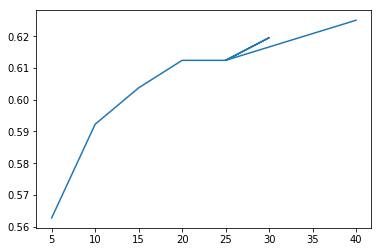

In [14]:
import matplotlib.pyplot as plt
plt.plot(k,accuracy)
plt.show()

In [15]:
#select k = 20
knn_best = KNeighborsClassifier(n_neighbors=20)
knn_best.fit(x_train,y_train)
y_pred = knn_best.predict(x_test)
np.mean(y_pred == y_test)
    

0.6123996029239238